<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h2>[분석 과정]</h2>
<ul>
<li>데이터 정보 및 전처리 과정은 data_preprocessing.ipynb 참고</li></ul>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [211]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [212]:
# 병합한 데이터 불러오기
travel_log = pd.read_csv('data/training/merged_data/merge.csv', encoding='UTF-8')


In [213]:
# 데이터의 행, 열 개수 출력
print('merge.csv의 행, 열 개수 : ')
print(travel_log.shape)

merge.csv의 행, 열 개수 : 
(3877, 35)


In [214]:
# 데이터의 구조와 타입 확인
print('merge.csv의 구조와 타입 : ')
print(travel_log.info())

merge.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     3877 non-null   object 
 1   AGE_GRP                    3877 non-null   int64  
 2   JOB_NM                     3877 non-null   object 
 3   TRAVEL_TERM                3877 non-null   object 
 4   TRAVEL_LIKE_SGG_1          3877 non-null   int64  
 5   TRAVEL_LIKE_SGG_2          3877 non-null   int64  
 6   TRAVEL_LIKE_SGG_3          3877 non-null   int64  
 7   TRAVEL_STYL_1              3877 non-null   object 
 8   TRAVEL_STYL_2              3877 non-null   object 
 9   TRAVEL_STYL_3              3877 non-null   object 
 10  TRAVEL_STYL_4              3877 non-null   object 
 11  TRAVEL_STYL_5              3877 non-null   object 
 12  TRAVEL_STYL_6              3877 non-null   object 
 13  TRAVEL_STYL_7              

In [215]:
# 데이터의 결측치 확인
print('merge.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
MAJOR_TRANSPORT              0
TOTAL_MVMN_WON               0
MAJOR_ACTIVITY_TYPE          0
TOTAL_ACTIVITY_WON   

In [216]:
# 데이터 살펴보기
travel_log.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,MAJOR_TRANSPORT,TOTAL_MVMN_WON,MAJOR_ACTIVITY_TYPE,TOTAL_ACTIVITY_WON,TOTAL_WON,TRAVEL_DURATION,SEASON
0,여,20,학생,1년,50130,50110,26500,자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(약),자연 선호(약),자연 선호(중),도시 선호(중),도시 선호(중),광주광역시,전남,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g002178,연인,남자,20대,쇼핑;SNS 인생샷 여행;시티투어,2023-06-14,2023-06-16,시티투어;쇼핑;SNS 인생샷 여행,['자가용(승용/승합/트럭 등등)'],"10,000.00",['휴식'],0.07,"10,000.07",2,Summer
1,남,40,전문가 및 관련 종사자,한달,48840,48220,26500,자연 선호(강),자연 선호(강),자연 선호(약),도시 선호(중),중립,자연 선호(중),도시 선호(강),도시 선호(강),대전광역시,전북,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g004485,연인,남자,30대,쇼핑;역사 유적지 방문;역사 유적지 방문;지역 문화예술/공연/전시시설 관람;유흥/오...,2023-07-28,2023-07-30,쇼핑;역사 유적지 방문;지역 문화예술/공연/전시시설 관람,['자가용(승용/승합/트럭 등등)'],"32,600.00",['체험 활동 / 입장 및 관람'],0.27,"32,600.27",2,Summer
2,남,20,관리자,1년,46710,45190,47170,자연 선호(중),자연 선호(약),자연 선호(강),중립,도시 선호(중),자연 선호(약),자연 선호(강),도시 선호(강),서울특별시,전남,2인 여행(가족 외),새로운 경험 추구,1,g_g005167,연인,여자,20대,"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;신...",2023-09-07,2023-09-10,SNS 인생샷 여행;신규 여행지 발굴;역사 유적지 방문,['자가용(승용/승합/트럭 등등)'],"138,400.00",['취식'],0.45,"138,400.45",3,Autumn
3,여,30,사무 종사자,한달,42150,42210,28710,자연 선호(중),자연 선호(중),자연 선호(약),자연 선호(중),자연 선호(약),도시 선호(약),자연 선호(중),도시 선호(중),인천광역시,대전,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g002887,배우자,여자,30대,쇼핑;시티투어;지역 축제/이벤트 참가;SNS 인생샷 여행;호캉스 여행,2023-07-01,2023-07-03,쇼핑;지역 축제/이벤트 참가;호캉스 여행,['자가용(승용/승합/트럭 등등)'],"70,000.00","['쇼핑 / 구매', '취식']",0.12,"70,000.12",2,Summer
4,남,20,서비스 종사자,한달,42150,50110,26350,자연 선호(중),자연 선호(강),자연 선호(중),중립,도시 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),경기도,충남,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g004189,연인,남자,20대,"SNS 인생샷 여행;야외 스포츠, 레포츠 활동;유흥/오락(나이트라이프)",2023-07-18,2023-07-20,"Well-ness 여행;야외 스포츠, 레포츠 활동;SNS 인생샷 여행",['자가용(승용/승합/트럭 등등)'],"52,083.00",['취식'],0.12,"52,083.12",2,Summer


<hr>
<h2>[분석 과정 - 군집화]</h2>

1. 원핫 인코딩 등 군집화를 위한 전처리 과정

In [ ]:
# 원핫 인코딩할 컬럼
categorical_columns = ['GENDER', 'JOB_NM', 'TRAVEL_TERM', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2',
                       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY', 
                       'TRAVEL_MOTIVE', 'SEASON']

# 수치형 컬럼
numerical_columns = ['AGE_GRP', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3',
                     'TRAVEL_COMPANIONS_NUM', 'TOTAL_MVMN_WON','TOTAL_ACTIVITY_WON', 'TOTAL_WON',
                     'TRAVEL_DURATION']

# MAJOR_ACTIVITY_TYPE: 리스트 형태로 분리 후 원핫 인코딩
mlb = MultiLabelBinarizer()
major_activity_type_encoded = pd.DataFrame(mlb.fit_transform(travel_log['MAJOR_ACTIVITY_TYPE'].apply(eval)),
                                           columns=mlb.classes_)

# 범주형 변수 원핫 인코딩
travel_log_encoded = pd.get_dummies(travel_log[categorical_columns])

# 수치형 변수 스케일링 (정규화)
scaler = StandardScaler()
travel_log_scaled = pd.DataFrame(scaler.fit_transform(travel_log[numerical_columns]), columns=numerical_columns)

# 데이터프레임 합치기
travel_log_final = pd.concat([travel_log_encoded, travel_log_scaled, major_activity_type_encoded], axis=1)

# 군집화에 사용할 최종 데이터프레임
print(travel_log_final.head())


   GENDER_남  GENDER_여  JOB_NM_관리자  JOB_NM_군인  JOB_NM_기능원 및 관련 기능 종사자  JOB_NM_기타  JOB_NM_농림어업 숙련 종사자  JOB_NM_단순노무종사자  JOB_NM_사무 종사자  JOB_NM_서비스 종사자  JOB_NM_장치․기계 조작 및 조립 종사자  JOB_NM_전문가 및 관련 종사자  JOB_NM_전업주부  JOB_NM_판매 종사자  JOB_NM_학생  TRAVEL_TERM_1년  TRAVEL_TERM_1주일  TRAVEL_TERM_기타  TRAVEL_TERM_한달  TRAVEL_STYL_1_도시 선호(강)  TRAVEL_STYL_1_도시 선호(약)  TRAVEL_STYL_1_도시 선호(중)  TRAVEL_STYL_1_자연 선호(강)  TRAVEL_STYL_1_자연 선호(약)  TRAVEL_STYL_1_자연 선호(중)  TRAVEL_STYL_1_중립  TRAVEL_STYL_2_도시 선호(강)  TRAVEL_STYL_2_도시 선호(약)  TRAVEL_STYL_2_도시 선호(중)  TRAVEL_STYL_2_자연 선호(강)  TRAVEL_STYL_2_자연 선호(약)  TRAVEL_STYL_2_자연 선호(중)  TRAVEL_STYL_2_중립  TRAVEL_STATUS_RESIDENCE_강원도  TRAVEL_STATUS_RESIDENCE_경기도  TRAVEL_STATUS_RESIDENCE_경상남도  TRAVEL_STATUS_RESIDENCE_경상북도  TRAVEL_STATUS_RESIDENCE_광주광역시  TRAVEL_STATUS_RESIDENCE_대구광역시  TRAVEL_STATUS_RESIDENCE_대전광역시  TRAVEL_STATUS_RESIDENCE_부산광역시  TRAVEL_STATUS_RESIDENCE_서울특별시  TRAVEL_STATUS_RESIDENCE_세종특별자치시  TRAVEL_STATUS_RESIDENCE_울산광역시  TRAVEL_STATUS_RESIDENCE_인천광역시  \
0     F

2. 군집화

In [218]:
# 군집화 (KMeans 예시)
kmeans = KMeans(n_clusters=4, random_state=42)
travel_log_final['Cluster'] = kmeans.fit_predict(travel_log_final)

# 군집 결과 확인
print(travel_log_final[['Cluster']].head())

   Cluster
0        3
1        2
2        1
3        3
4        3


c:\Users\kimbomi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


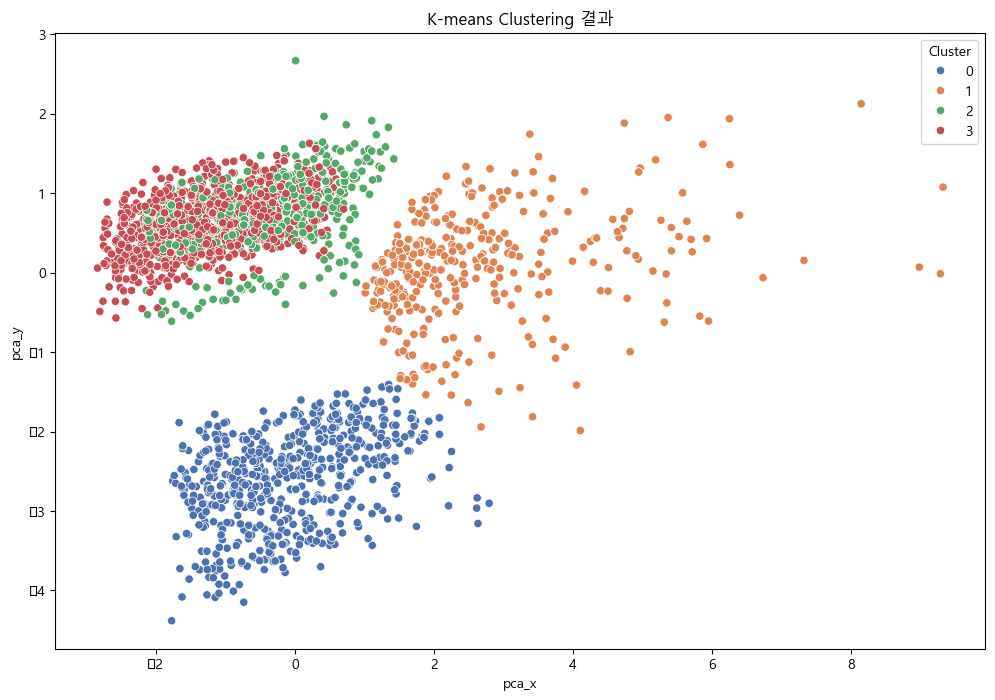

In [219]:
# PCA를 이용하여 2차원으로 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(travel_log_final)
travel_log_final['pca_x'] = pca_components[:, 0]
travel_log_final['pca_y'] = pca_components[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_final, palette='deep')
plt.title('K-means Clustering 결과')
plt.show()

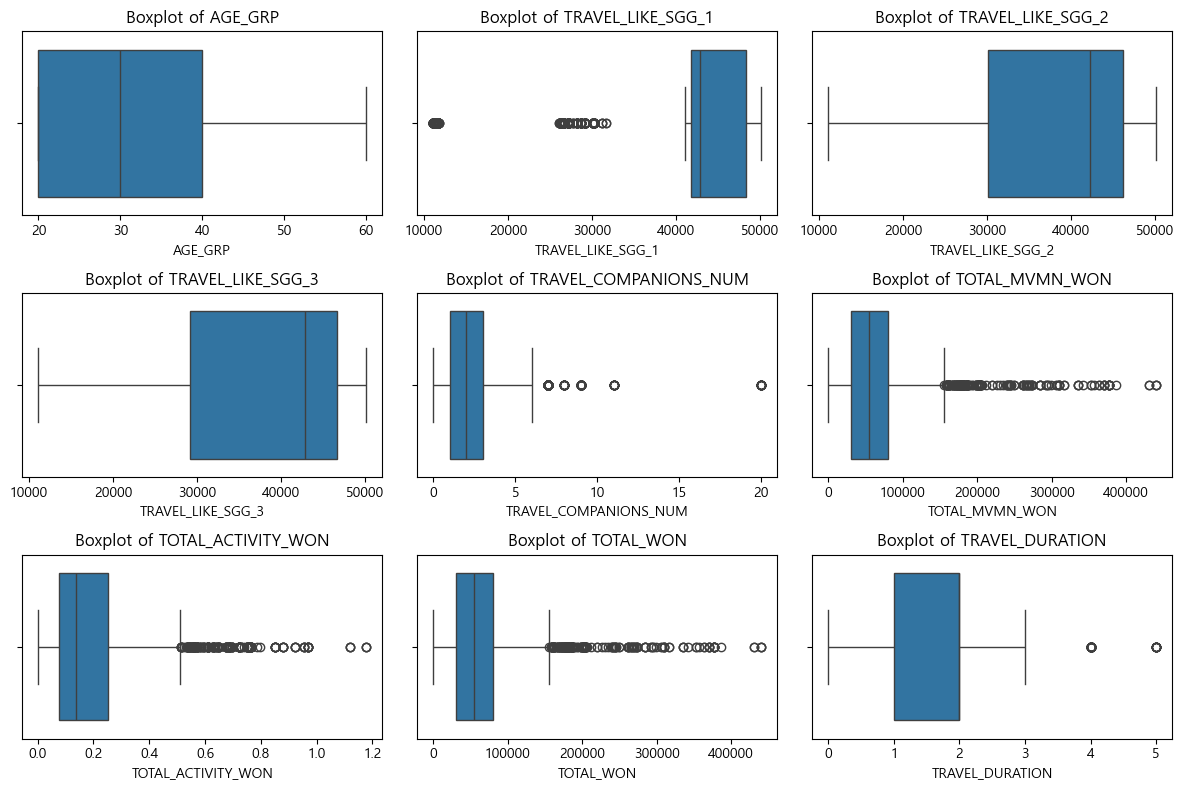

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수에 대해 박스플롯을 그려 이상값을 확인
numerical_columns = ['AGE_GRP', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3', 
                     'TRAVEL_COMPANIONS_NUM', 'TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TOTAL_WON',
                     'TRAVEL_DURATION']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=travel_log[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<hr>
<h2>[분석 과정 - 기초 시각화]</h2>

In [221]:
# 주요 여행 동기 빈도 확인
print(travel_log['TRAVEL_MOTIVE'].value_counts())

TRAVEL_MOTIVE
여행 동반자와의 친밀감 및 유대감 증진               1198
일상적인 환경 및 역할에서의 탈출, 지루함 탈피           915
쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식        712
새로운 경험 추구                            368
역사 탐방, 문화적 경험 등 교육적 동기               236
운동, 건강 증진 및 충전                       123
SNS 사진 등록 등 과시                       111
특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)     107
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기           68
기타                                    39
Name: count, dtype: int64


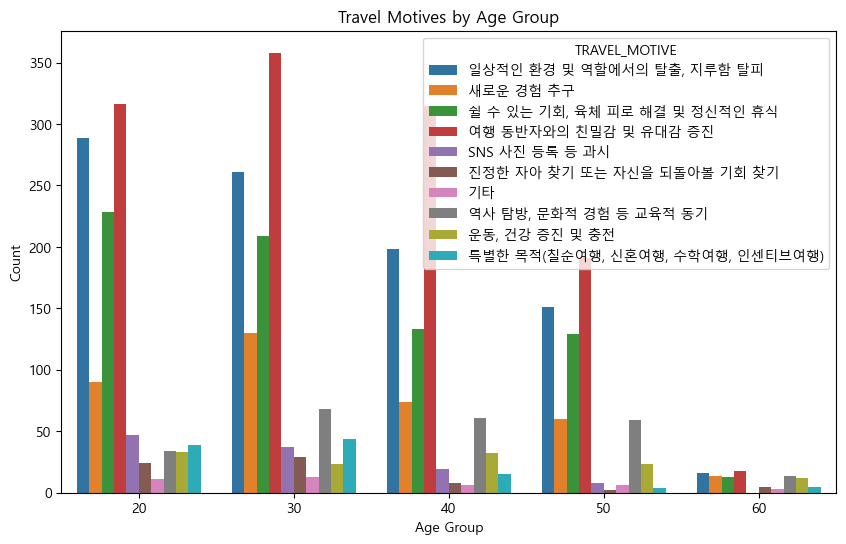

In [222]:
# 연령대별 여행 동기 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=travel_log, x='AGE_GRP', hue='TRAVEL_MOTIVE')
plt.title('Travel Motives by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
